Testing with full data


C:\Users\adity\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     97808
      normal       1.00      1.00      1.00     24376

    accuracy                           1.00    122184
   macro avg       1.00      1.00      1.00    122184
weighted avg       1.00      1.00      1.00    122184

TN - True Negative 97794
FP - False Positive 24
FN - False Negative 14
TP - True Positive 24352
Accuracy Rate: 0.9996889936489229
Misclassification Rate: 0.0003110063510770641


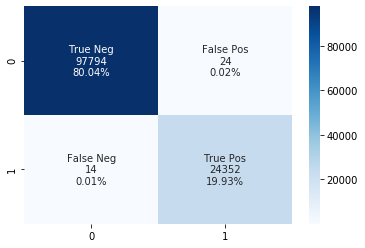

In [2]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
import numpy as np
import seaborn as sns
%matplotlib inline

def get_features(data):
	features = []
	for key in data.keys():
		features.append(key)
	features.remove("label")
	return features

def with_full_features(data):
    print("Testing with full data")
    
    features = get_features(data)
    X = data[features]
    y = data["label"]
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
    
    sc_x = StandardScaler() 
    X_train = sc_x.fit_transform(X_train)  
    X_test = sc_x.transform(X_test) 
    
    classifier = LogisticRegression(random_state = 0) 
    classifier.fit(X_train, y_train) 
    
    y_pred = classifier.predict(X_test) 
    
#     knn = KNeighborsClassifier(n_neighbors = 5)
    
   # start = time.time() 
#     knn.fit(X_train,y_train)
    
   # print("[+] Classifier trained in " + str(time.time() - start) )
    
   # start = time.time()
   # score = knn.score(X_test,y_test)
    
    #y_pred = knn.predict(X_test)
    cm_train = metrics.classification_report(y_pred , y_test)
    print(cm_train)

   # print("[+] Model Evaluated in " + str(time.time()-start) )
    #print("[!] Test score is "  + str(score) )
    #print( "-------------------------------------------------")
    
    cmat = metrics.confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cmat.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cmat.flatten()/np.sum(cmat)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cmat, annot=labels, fmt='', cmap='Blues')
    
    print('TN - True Negative {}'.format(cmat[0,0]))
    print('FP - False Positive {}'.format(cmat[0,1]))
    print('FN - False Negative {}'.format(cmat[1,0]))
    print('TP - True Positive {}'.format(cmat[1,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))


def main():
	filename="preprocessed_kddcup_data"
	data = pd.read_csv(filename)

	with_full_features(data)


main()